In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
# Step 1: Load and preprocess the data
# Replace 'weather_data.csv' with your dataset path
data = pd.read_csv('weather_data.csv')

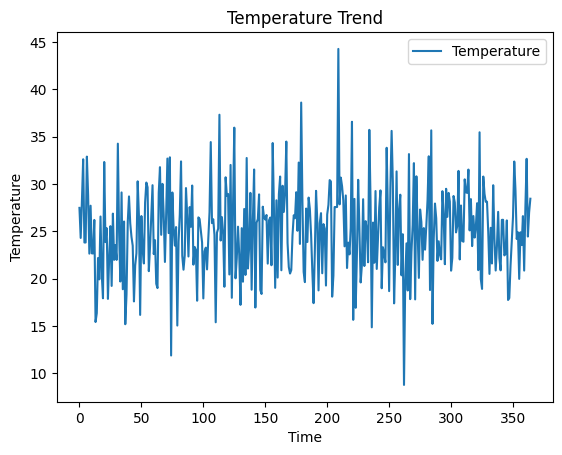

In [4]:
# Visualize the data
plt.plot(data['Temperature'], label='Temperature')
plt.title("Temperature Trend")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [5]:
# Normalize the data (use all columns as features)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Temperature', 'Humidity', 'Wind Speed', 'Pressure']])

In [6]:
# Create sequences for the LSTM model
sequence_length = 305  # Use the last 60 readings to predict the next one
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, :])  # Use all features
    y.append(scaled_data[i, 0])  # Predict temperature

In [7]:
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))  # Reshape for LSTM input

In [8]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 2: Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)  # Output layer (predicting temperature)
])

C:\Users\amang\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 305, 50)             │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 305, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,501 (126.96 KB)

 Trainable params: 32,501 (126.96 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Step 3: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - loss: 0.1451 - val_loss: 0.0118
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 587ms/step - loss: 0.0210 - val_loss: 0.0513
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 910ms/step - loss: 0.0682 - val_loss: 0.0332
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 618ms/step - loss: 0.0310 - val_loss: 0.0097
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step - loss: 0.0137 - val_loss: 0.0113
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 466ms/step - loss: 0.0205 - val_loss: 0.0173
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 422ms/step - loss: 0.0295 - val_loss: 0.0172
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 468ms/step - loss: 0.0257 - val_loss: 0.0123
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - loss: 0.0219 - val_loss: 0.0090
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.0190 - val_loss: 0.0092
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 980ms/step - loss: 0.0228 - val_loss: 0.0112
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 719ms/step - loss: 0.0176 - val_loss: 0

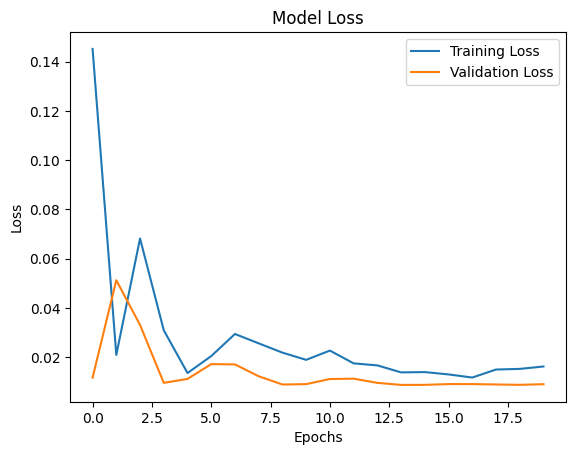

In [12]:
# Step 4: Evaluate the model
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
# Step 5: Make predictions
predicted_temperatures = model.predict(X_test)
predicted_temperatures = scaler.inverse_transform(np.hstack((predicted_temperatures, np.zeros((predicted_temperatures.shape[0], 3)))))[:, 0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


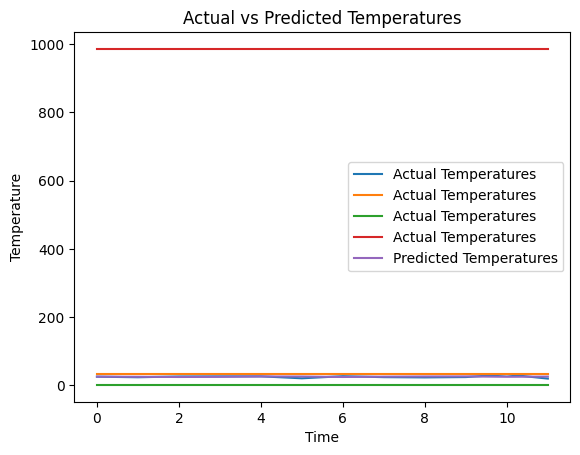

In [14]:
# Plot actual vs predicted temperatures
plt.plot(scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))))), label="Actual Temperatures")
plt.plot(predicted_temperatures, label="Predicted Temperatures")
plt.title("Actual vs Predicted Temperatures")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [15]:
# Step 6: Forecast future values
# Use the last available data for forecasting
last_sequence = scaled_data[-sequence_length:]
last_sequence = last_sequence.reshape((1, sequence_length, last_sequence.shape[1]))
forecasted_value = model.predict(last_sequence)
forecasted_value = scaler.inverse_transform(np.hstack((forecasted_value, np.zeros((forecasted_value.shape[0], 3)))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


In [16]:
print("Forecasted Temperature for the next time step:", forecasted_value[0][0])

Forecasted Temperature for the next time step: 26.559833907507358
